# PROJECT BENSON: VKMC Consulting - MTA Turnstile Data

# CHARISSA

## Import Data

In [1]:
from __future__ import print_function, division

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tseries.offsets import *
%matplotlib inline

In [3]:
import datetime

In [4]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        print('Processing {}...'.format(week_num))
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs, ignore_index=True)

# weeks from Apr 2015 - Jan 2018
week_nums =[
            180113,
            180106,
            171230,
            171223,
            171216,
            171209,
            171202,
            171125,
            171118,
            171111,
            171104,
            171028,
            171021,
            171014,
            171007,
            170930,
            170923,
            170916,
            170909,
            170902,
            170826,
            170819,
            170812,
            170805,
            170729,
            170722,
            170715,
            170708,
            170701,
            170624,
            170617,
            170610,
            170603,
            170527,
            170520,
            170513,
            170506,
            170429,
            170422,
            170415,
            170408,
            170401,
            170325,
            170318,
            170311,
            170304,
            170225,
            170218,
            170211,
            170204,
            170128,
            170121,
            170114,
            170107,
            161231,
            161224,
            161217,
            161210,
            161203,
            161126,
            161119,
            161112,
            161105,
            161029,
            161022,
            161015,
            161008,
            161001,
            160924,
            160917,
            160910,
            160903,
            160827,
            160820,
            160813,
            160806,
            160730,
            160723,
            160716,
            160709,
            160702,
            160625,
            160618,
            160611,
            160604,
            160528,
            160521,
            160514,
            160507,
            160430,
            160423,
            160416,
            160409,
            160402,
            160326,
            160319,
            160312,
            160305,
            160227,
            160220,
            160213,
            160206,
            160130,
            160123,
            160116,
            160109,
            160102,
            151226,
            151219,
            151212,
            151205,
            151128,
            151121,
            151114,
            151107,
            151031,
            151024,
            151017,
            151010,
            151003,
            150926,
            150919,
            150912,
            150905,
            150829,
            150822,
            150815,
            150808,
            150801,
            150725,
            150718,
            150711,
            150704,
            150627,
            150620,
            150613,
            150606,
            150530,
            150523,
            150516,
            150509,
            150502,
            150425,
            150418,
            150411,
            150404
           ]
turnstiles_df_original = get_data(week_nums)

Processing 180113...
Processing 180106...
Processing 171230...
Processing 171223...
Processing 171216...
Processing 171209...
Processing 171202...
Processing 171125...
Processing 171118...
Processing 171111...
Processing 171104...
Processing 171028...
Processing 171021...
Processing 171014...
Processing 171007...
Processing 170930...
Processing 170923...
Processing 170916...
Processing 170909...
Processing 170902...
Processing 170826...
Processing 170819...
Processing 170812...
Processing 170805...
Processing 170729...
Processing 170722...
Processing 170715...
Processing 170708...
Processing 170701...
Processing 170624...
Processing 170617...
Processing 170610...
Processing 170603...
Processing 170527...
Processing 170520...
Processing 170513...
Processing 170506...
Processing 170429...
Processing 170422...
Processing 170415...
Processing 170408...
Processing 170401...
Processing 170325...
Processing 170318...
Processing 170311...
Processing 170304...
Processing 170225...
Processing 17

In [5]:
turnstiles_df = pd.DataFrame(turnstiles_df_original)

In [6]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,03:00:00,REGULAR,6470216,2190123
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,07:00:00,REGULAR,6470223,2190140
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,11:00:00,REGULAR,6470256,2190229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,15:00:00,REGULAR,6470379,2190299
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,19:00:00,REGULAR,6470665,2190366


## Check Column Name Formatting

In [7]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [8]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [9]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [10]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,03:00:00,REGULAR,6470216,2190123
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,07:00:00,REGULAR,6470223,2190140
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,11:00:00,REGULAR,6470256,2190229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,15:00:00,REGULAR,6470379,2190299
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,19:00:00,REGULAR,6470665,2190366


In [11]:
turnstiles_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
28446947,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/03/2015,05:00:00,REGULAR,5554,202
28446948,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/03/2015,09:00:00,REGULAR,5554,202
28446949,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/03/2015,13:00:00,REGULAR,5554,202
28446950,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/03/2015,17:00:00,REGULAR,5554,202
28446951,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/03/2015,21:00:00,REGULAR,5554,202


## Convert Date & Time, and Date to datetime objects

In [12]:
from datetime import datetime

In [13]:
turnstiles_df['DATE_TIME'] = turnstiles_df['DATE'] + " " + turnstiles_df['TIME']

In [14]:
turnstiles_df['DATE_TIME'] = pd.to_datetime(turnstiles_df['DATE_TIME'], format='%m/%d/%Y %H:%M:%S')

In [15]:
turnstiles_df['DATE_NEW'] = pd.to_datetime(turnstiles_df['DATE'], format='%m/%d/%Y')

In [16]:
turnstiles_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DATE_NEW
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,03:00:00,REGULAR,6470216,2190123,2018-01-06 03:00:00,2018-01-06
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,07:00:00,REGULAR,6470223,2190140,2018-01-06 07:00:00,2018-01-06
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,11:00:00,REGULAR,6470256,2190229,2018-01-06 11:00:00,2018-01-06
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,15:00:00,REGULAR,6470379,2190299,2018-01-06 15:00:00,2018-01-06
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,19:00:00,REGULAR,6470665,2190366,2018-01-06 19:00:00,2018-01-06
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,23:00:00,REGULAR,6470809,2190398,2018-01-06 23:00:00,2018-01-06
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/07/2018,03:00:00,REGULAR,6470843,2190405,2018-01-07 03:00:00,2018-01-07
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/07/2018,07:00:00,REGULAR,6470849,2190411,2018-01-07 07:00:00,2018-01-07
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/07/2018,11:00:00,REGULAR,6470884,2190488,2018-01-07 11:00:00,2018-01-07
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/07/2018,15:00:00,REGULAR,6471042,2190530,2018-01-07 15:00:00,2018-01-07


## Check Value Counts for Dates

In [17]:
turnstiles_df['DATE_NEW'].value_counts().sort_index()

2015-03-28    27208
2015-03-29    27207
2015-03-30    27257
2015-03-31    27503
2015-04-01    27233
2015-04-02    27510
2015-04-03    27467
2015-04-04    27193
2015-04-05    27179
2015-04-06    27639
2015-04-07    27702
2015-04-08    27708
2015-04-09    27425
2015-04-10    27526
2015-04-11    27344
2015-04-12    27353
2015-04-13    27619
2015-04-14    27467
2015-04-15    27382
2015-04-16    27432
2015-04-17    27065
2015-04-18    27177
2015-04-19    27230
2015-04-20    27106
2015-04-21    27216
2015-04-22    27338
2015-04-23    27547
2015-04-24    27388
2015-04-25    27232
2015-04-26    27265
              ...  
2017-12-14    28921
2017-12-15    28387
2017-12-16    27997
2017-12-17    27982
2017-12-18    28197
2017-12-19    28138
2017-12-20    28762
2017-12-21    29508
2017-12-22    28890
2017-12-23    27993
2017-12-24    28047
2017-12-25    27919
2017-12-26    28165
2017-12-27    28964
2017-12-28    28237
2017-12-29    27890
2017-12-30    28206
2017-12-31    28076
2018-01-01    28157


## Create Weekday and Workday Column

In [18]:
turnstiles_df["WEEKDAY"] = turnstiles_df["DATE_NEW"].dt.weekday_name

In [19]:
turnstiles_df['WORKDAY'] = [True if day == 'Saturday' or day == 'Sunday' else False for day in turnstiles_df['WEEKDAY']]

In [20]:
turnstiles_df.sample(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DATE_NEW,WEEKDAY,WORKDAY
22605730,R138,R293,00-06-00,34 ST-PENN STA,123ACE,IRT,10/24/2015,22:00:00,REGULAR,4499798,4048904,2015-10-24 22:00:00,2015-10-24,Saturday,True
5417434,N114,R297,01-05-01,FRANKLIN AV,ACS,IND,07/07/2017,01:00:00,REGULAR,67108864,16777253,2017-07-07 01:00:00,2017-07-07,Friday,False
4451017,N400A,R359,02-00-03,COURT SQ,EMG,IND,08/07/2017,20:00:00,REGULAR,753137,132544,2017-08-07 20:00:00,2017-08-07,Monday,False
2269251,N333,R141,01-00-01,FOREST HILLS 71,EFMR,IND,10/24/2017,21:00:00,REGULAR,39549,14048,2017-10-24 21:00:00,2017-10-24,Tuesday,False
5862778,PTH06,R546,00-00-00,PAVONIA/NEWPORT,1,PTH,06/21/2017,02:39:20,REGULAR,277219,54385,2017-06-21 02:39:20,2017-06-21,Wednesday,False
10305629,H040,R376,00-00-00,EAST 105 ST,L,BMT,01/07/2017,08:00:00,REGULAR,8273280,6478042,2017-01-07 08:00:00,2017-01-07,Saturday,True
2726988,R204,R043,02-05-01,WALL ST,45,IRT,10/07/2017,14:00:00,REGULAR,50097,235263122,2017-10-07 14:00:00,2017-10-07,Saturday,True
24367317,R228,R143,00-00-00,28 ST,6,IRT,08/26/2015,01:00:00,REGULAR,1674088,3203099,2015-08-26 01:00:00,2015-08-26,Wednesday,False
14048540,OB01,R459,00-03-00,ORCHARD BEACH,6,IND,08/28/2016,08:00:00,REGULAR,18920,1288,2016-08-28 08:00:00,2016-08-28,Sunday,True
21169906,N057,R188,00-00-02,50 ST,CE,IND,12/15/2015,03:00:00,REGULAR,1675392,529812,2015-12-15 03:00:00,2015-12-15,Tuesday,False


## Dedupe Station Names

In [21]:
stations = sorted(list(turnstiles_df.STATION.unique()))
len(stations)

571

In [22]:
stations

['1 AV',
 '1 AVE',
 '103 ST',
 '103 ST-CORONA',
 '104 ST',
 '110 ST',
 '110 ST-CATHEDRL',
 '110 ST-CPN',
 '111 ST',
 '116 ST',
 '116 ST-COLUMBIA',
 '121 ST',
 '125 ST',
 '135 ST',
 '137 ST CITY COL',
 '137 ST-CITY COL',
 '138 ST-3 AVE',
 '138 ST-GR CONC',
 '138/GRAND CONC',
 '14 ST',
 '14 ST-6 AVE',
 '14 ST-UNION SQ',
 '145 ST',
 '148 ST-LENOX',
 '149 ST-3 AVE',
 '149 ST-GR CONC',
 '149/GRAND CONC',
 '14TH STREET',
 '15 ST-PROSPECT',
 '155 ST',
 '157 ST',
 '161 ST-YANKEE',
 '161/YANKEE STAD',
 '163 ST-AMSTERDM',
 '167 ST',
 '168 ST',
 '168 ST-BROADWAY',
 '169 ST',
 '170 ST',
 '174 ST',
 '174-175 ST',
 '174-175 STS',
 '175 ST',
 '176 ST',
 '18 AV',
 '18 AVE',
 '18 ST',
 '181 ST',
 '182-183 ST',
 '182-183 STS',
 '183 ST',
 '190 ST',
 '191 ST',
 '2 AV',
 '2 AVE',
 '20 AV',
 '20 AVE',
 '207 ST',
 '21 ST',
 '21 ST-QNSBRIDGE',
 '215 ST',
 '219 ST',
 '22 AVE-BAY PKY',
 '225 ST',
 '23 ST',
 '23 ST-5 AVE',
 '23 ST-6 AVE',
 '231 ST',
 '233 ST',
 '238 ST',
 '242 ST',
 '25 AV',
 '25 AVE',
 '25 ST'

In [23]:
turnstiles_df['STATION_DEDUPED'] = turnstiles_df['STATION']

In [24]:
changes = {' AVE' : ' AV', 
           ' PARKWAY' : ' PKWY', 
           ' ROAD' : ' RD', 
           ' STS' : ' ST', 
           ' PARK' : ' PK',
           ' ISLND' : ' IS', 
           '/' :' ', 
           '-': ' ',
           '52 ST LINCOLN' : '52 ST',
           '69 ST FISK AV' : '69 ST',
           '68ST HUNTER COL': '68 ST HUNTER CO',
           'ATL AV' : 'ATLANTIC AV',
           'GRAND NEWTOWN' : 'GRAND AV NEWTOWN',
           'BEVERLY RD' : 'BEVERLEY RD',
           '52 ST AV' : '52 ST',
           ' AV NEWTON' : ' AV NEWTOWN',
           'AVNEWTOWN' : 'AV NEWTOWN',
           'WOODLAWN RD' : 'WOODLAWN',
           'NEW LOTS AV' : 'NEW LOTS',
           'NEW LOTS' : 'NEW LOTS AV',
           'BARCLAYS CENTER' : 'ATLANTIC AV BARCLAY'
          }

In [25]:
for a,b in changes.items():
    turnstiles_df['STATION_DEDUPED'] = turnstiles_df['STATION_DEDUPED'].str.replace(a,b)

In [26]:
stations_new = sorted(list(turnstiles_df.STATION_DEDUPED.unique()))
len(stations_new)

460

In [27]:
stations_new

['1 AV',
 '103 ST',
 '103 ST CORONA',
 '104 ST',
 '110 ST',
 '110 ST CATHEDRL',
 '110 ST CPN',
 '111 ST',
 '116 ST',
 '116 ST COLUMBIA',
 '121 ST',
 '125 ST',
 '135 ST',
 '137 ST CITY COL',
 '138 GRAND CONC',
 '138 ST 3 AV',
 '138 ST GR CONC',
 '14 ST',
 '14 ST 6 AV',
 '14 ST UNION SQ',
 '145 ST',
 '148 ST LENOX',
 '149 GRAND CONC',
 '149 ST 3 AV',
 '149 ST GR CONC',
 '14TH STREET',
 '15 ST PROSPECT',
 '155 ST',
 '157 ST',
 '161 ST YANKEE',
 '161 YANKEE STAD',
 '163 ST AMSTERDM',
 '167 ST',
 '168 ST',
 '168 ST BROADWAY',
 '169 ST',
 '170 ST',
 '174 175 ST',
 '174 ST',
 '175 ST',
 '176 ST',
 '18 AV',
 '18 ST',
 '181 ST',
 '182 183 ST',
 '183 ST',
 '190 ST',
 '191 ST',
 '2 AV',
 '20 AV',
 '207 ST',
 '21 ST',
 '21 ST QNSBRIDGE',
 '215 ST',
 '219 ST',
 '22 AV BAY PKY',
 '225 ST',
 '23 ST',
 '23 ST 5 AV',
 '23 ST 6 AV',
 '231 ST',
 '233 ST',
 '238 ST',
 '242 ST',
 '25 AV',
 '25 ST',
 '28 ST',
 '28 ST BROADWAY',
 '3 AV',
 '3 AV 138 ST',
 '3 AV 149 ST',
 '30 AV',
 '33 ST',
 '33 ST RAWSON ST',

## Prepare Database for Mapping STATION_LINE to NEIGHBORHOOD and BOROUGH

In [28]:
# Used to check the linenames associated with each station of interest
turnstiles_df[(turnstiles_df['STATION_DEDUPED']=='WOODLAWN')].groupby(turnstiles_df['LINENAME'])['EXITS'].max()

LINENAME
4    6401719
Name: EXITS, dtype: int64

In [29]:
# Used to check if certain linenames existed and with which station they were associated
turnstiles_df[(turnstiles_df['LINENAME'] == '4')].groupby(turnstiles_df['STATION_DEDUPED'])['EXITS'].max()

STATION_DEDUPED
167 ST                9226230
170 ST              553854221
176 ST                4593108
183 ST             1864634734
BEDFORD PK BL        15863603
BEDFORD PK BLVD      16967263
BURNSIDE AV           5628180
FORDHAM RD           16777546
KINGSBRIDGE RD       11306728
MOSHOLU PKWY          5267709
MT EDEN AV            4386122
WOODLAWN              6401719
Name: EXITS, dtype: int64

In [30]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DATE_NEW,WEEKDAY,WORKDAY,STATION_DEDUPED
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,03:00:00,REGULAR,6470216,2190123,2018-01-06 03:00:00,2018-01-06,Saturday,True,59 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,07:00:00,REGULAR,6470223,2190140,2018-01-06 07:00:00,2018-01-06,Saturday,True,59 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,11:00:00,REGULAR,6470256,2190229,2018-01-06 11:00:00,2018-01-06,Saturday,True,59 ST
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,15:00:00,REGULAR,6470379,2190299,2018-01-06 15:00:00,2018-01-06,Saturday,True,59 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,19:00:00,REGULAR,6470665,2190366,2018-01-06 19:00:00,2018-01-06,Saturday,True,59 ST


In [31]:
turnstiles_df['STATION_LINE'] = turnstiles_df['STATION_DEDUPED'] + " - " + turnstiles_df['LINENAME']

In [32]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DATE_NEW,WEEKDAY,WORKDAY,STATION_DEDUPED,STATION_LINE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,03:00:00,REGULAR,6470216,2190123,2018-01-06 03:00:00,2018-01-06,Saturday,True,59 ST,59 ST - NQR456W
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,07:00:00,REGULAR,6470223,2190140,2018-01-06 07:00:00,2018-01-06,Saturday,True,59 ST,59 ST - NQR456W
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,11:00:00,REGULAR,6470256,2190229,2018-01-06 11:00:00,2018-01-06,Saturday,True,59 ST,59 ST - NQR456W
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,15:00:00,REGULAR,6470379,2190299,2018-01-06 15:00:00,2018-01-06,Saturday,True,59 ST,59 ST - NQR456W
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,19:00:00,REGULAR,6470665,2190366,2018-01-06 19:00:00,2018-01-06,Saturday,True,59 ST,59 ST - NQR456W


In [33]:
# Fix linenames of stations with inconsistent naming of linenames

# STATION_DEDUPED == 'CANAL ST' & LINENAME == 'JNQRZ6' 
#       --> LINENAME = 'JNQRZ6W'
canalstjnq = turnstiles_df['STATION_LINE'] == 'CANAL ST - JNQRZ6' 
turnstiles_df.loc[canalstjnq,'STATION_LINE'] = 'CANAL ST - JNQRZ6W'

# STATION_DEDUPED == 'ATLANTIC AV BARCLAY' & LINENAME == 'BDNQR2345' 
#       --> LINENAME = '2345BDNQR'

atlavbdn = turnstiles_df['STATION_LINE'] == 'ATLANTIC AV BARCLAY - BDNQR2345' 
turnstiles_df.loc[atlavbdn,'STATION_LINE'] = 'ATLANTIC AV BARCLAY - 2345BDNQR'

In [34]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DATE_NEW,WEEKDAY,WORKDAY,STATION_DEDUPED,STATION_LINE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,03:00:00,REGULAR,6470216,2190123,2018-01-06 03:00:00,2018-01-06,Saturday,True,59 ST,59 ST - NQR456W
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,07:00:00,REGULAR,6470223,2190140,2018-01-06 07:00:00,2018-01-06,Saturday,True,59 ST,59 ST - NQR456W
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,11:00:00,REGULAR,6470256,2190229,2018-01-06 11:00:00,2018-01-06,Saturday,True,59 ST,59 ST - NQR456W
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,15:00:00,REGULAR,6470379,2190299,2018-01-06 15:00:00,2018-01-06,Saturday,True,59 ST,59 ST - NQR456W
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,19:00:00,REGULAR,6470665,2190366,2018-01-06 19:00:00,2018-01-06,Saturday,True,59 ST,59 ST - NQR456W


In [35]:
turnstiles_df[(turnstiles_df['STATION_LINE']=='CANAL ST - JNQRZ6W')].groupby(turnstiles_df['LINENAME'])['EXITS'].max()

LINENAME
JNQRZ6     2030260015
JNQRZ6W    2030622135
Name: EXITS, dtype: int64

In [36]:
len(turnstiles_df['STATION_LINE'].unique())

606

In [37]:
station_check = turnstiles_df['STATION_LINE'].value_counts().sort_index()

In [38]:
station_check.head()

1 AV - L             61904
103 ST - 1           37045
103 ST - 6           37275
103 ST - BC          18496
103 ST CORONA - 7    55746
Name: STATION_LINE, dtype: int64

In [39]:
station_check.loc['DEKALB AV - L']

37106

In [40]:
stationscheck = sorted(list(turnstiles_df['STATION_LINE'].unique()))

In [41]:
stationscheck

['1 AV - L',
 '103 ST - 1',
 '103 ST - 6',
 '103 ST - BC',
 '103 ST CORONA - 7',
 '104 ST - A',
 '104 ST - JZ',
 '110 ST - 6',
 '110 ST CATHEDRL - 1',
 '110 ST CPN - 23',
 '111 ST - 7',
 '111 ST - A',
 '111 ST - J',
 '116 ST - 23',
 '116 ST - 6',
 '116 ST - BC',
 '116 ST COLUMBIA - 1',
 '121 ST - JZ',
 '125 ST - 1',
 '125 ST - 23',
 '125 ST - 456',
 '125 ST - ACBD',
 '135 ST - 23',
 '135 ST - BC',
 '137 ST CITY COL - 1',
 '138 GRAND CONC - 45',
 '138 ST 3 AV - 6',
 '138 ST GR CONC - 45',
 '14 ST - 123FLM',
 '14 ST - ACEL',
 '14 ST - FLM123',
 '14 ST 6 AV - FLM123',
 '14 ST UNION SQ - 456LNQR',
 '14 ST UNION SQ - 456LNQRW',
 '14 ST UNION SQ - LNQR456',
 '14 ST UNION SQ - LNQR456W',
 '145 ST - 1',
 '145 ST - 3',
 '145 ST - ABCD',
 '148 ST LENOX - 3',
 '149 GRAND CONC - 245',
 '149 ST 3 AV - 25',
 '149 ST GR CONC - 245',
 '14TH STREET - 1',
 '15 ST PROSPECT - FG',
 '155 ST - BD',
 '155 ST - C',
 '157 ST - 1',
 '161 ST YANKEE - 4BD',
 '161 ST YANKEE - BD4',
 '161 YANKEE STAD - 4BD',
 '161 

## Create NEIGHBORHOOD, BOROUGH, and ZIPCODE column with values based on station name

In [42]:
# Create dictionaries

# -------------------CODE----------------

# import csv

# reader = csv.reader(open('neighborhoods.csv', 'r'))
# neighborhoods = {rows[0]:rows[1] for rows in reader}

# reader = csv.reader(open('boroughs.csv', 'r'))
# boroughs = {rows[0]:rows[1] for rows in reader}

# -------------------CODE----------------


# I'm just copying the resulting dictionaries here

neighborhoods = {'125 ST  - 1': 'West Harlem',
 '125 ST - 23': 'West Harlem',
 '125 ST - ACBD': 'West Harlem',
 '135 ST - 23': 'West Harlem',
 '135 ST - BC': 'West Harlem',
 '137 ST CITY COL - 1': 'West Harlem',
 '46 ST - MR': 'Woodside',
 '52 ST - 7': 'Woodside',
 '61 ST WOODSIDE - 7': 'Woodside',
 '65 ST - MR': 'Woodside',
 '69 ST - 7': 'Woodside',
 '82 ST JACKSON H - 7': 'Elmhurst',
 '90 ST ELMHURST - 7': 'Elmhurst',
 'ATLANTIC AV BARCLAY - 2345BDNQR': 'Fort Greene',
 'BEVERLEY RD - BQ': 'Prospect Park South',
 'BRIGHTON BEACH - BQ': 'Brighton Beach',
 'CANAL ST - JNQRZ6W': 'Chinatown',
 'CHURCH AV - BQ': 'Prospect Park South',
 'DEKALB AV - BDNQR': 'Fort Greene',
 'ELMHURST AV - MR': 'Elmhurst',
 'EUCLID AV - AC': 'East New York',
 'FULTON ST - G': 'Fort Greene',
 'GRAND AV NEWTOWN - MR': 'Elmhurst',
 'JUNCTION BLVD - 7': 'Elmhurst',
 'LAFAYETTE AV - C': 'Fort Greene',
 'LIVONIA AV - L': 'East New York',
 'MAIN ST - 7': 'Flushing',
 'MOSHOLU PKWY - 4': 'Norwood',
 'NEVINS ST - 2345': 'Fort Greene',
 'NEW LOTS AV - 3': 'East New York',
 'NEW LOTS AV - L': 'East New York',
 'NORTHERN BLVD - MR': 'Woodside',
 'OCEAN PKWY - Q': 'Brighton Beach',
 'PENNSYLVANIA AV - 3': 'East New York',
 'ROOSEVELT AV - EFMR7': 'Elmhurst',
 'SHEPHERD AV - C': 'East New York',
 'STATION_LINE': 'NEIGHBORHOOD',
 'SUTTER AV - L': 'East New York',
 'VAN SICLEN AV - 3': 'East New York',
 'WOODHAVEN BLVD - MR': 'Elmhurst',
 'WOODLAWN - 4': 'Norwood'}

boroughs = {'Brighton Beach': 'Brooklyn',
 'Chinatown': 'Manhattan',
 'East New York': 'Brooklyn',
 'Elmhurst': 'Queens',
 'Flushing': 'Queens',
 'Fort Greene': 'Brooklyn',
 'NEIGHBORHOOD': 'BOROUGH',
 'Norwood': 'Bronx',
 'Prospect Park South': 'Brooklyn',
 'West Harlem': 'Manhattan',
 'Woodside': 'Queens'}

zipcodes ={'Brighton Beach':11235,
          'Chinatown':10013,
          'East New York':11208,
          'Elmhurst': 11373,
          'Flushing':11355,
          'Fort Greene':11205,
          'Norwood':11368,
          'Prospect Park South':11215,
          'West Harlem':10030,
          'Woodside':11377
         }

In [43]:
# Map NEIGHBORHOOD to STATION_LINE

turnstiles_df['NEIGHBORHOOD'] = turnstiles_df['STATION_LINE'].map(neighborhoods)

In [44]:
# Map BOROUGH to NEIGHBORHOOD

turnstiles_df['BOROUGH'] = turnstiles_df['NEIGHBORHOOD'].map(boroughs)

In [45]:
# Map ZIPCODE to NEIGHBORHOOD

turnstiles_df['ZIPCODE'] = turnstiles_df['NEIGHBORHOOD'].map(zipcodes)

In [46]:
turnstiles_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DATE_NEW,WEEKDAY,WORKDAY,STATION_DEDUPED,STATION_LINE,NEIGHBORHOOD,BOROUGH,ZIPCODE
28446947,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/03/2015,05:00:00,REGULAR,5554,202,2015-04-03 05:00:00,2015-04-03,Friday,False,RIT ROOSEVELT,RIT ROOSEVELT - R,NaN,NaN,NaN
28446948,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/03/2015,09:00:00,REGULAR,5554,202,2015-04-03 09:00:00,2015-04-03,Friday,False,RIT ROOSEVELT,RIT ROOSEVELT - R,NaN,NaN,NaN
28446949,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/03/2015,13:00:00,REGULAR,5554,202,2015-04-03 13:00:00,2015-04-03,Friday,False,RIT ROOSEVELT,RIT ROOSEVELT - R,NaN,NaN,NaN
28446950,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/03/2015,17:00:00,REGULAR,5554,202,2015-04-03 17:00:00,2015-04-03,Friday,False,RIT ROOSEVELT,RIT ROOSEVELT - R,NaN,NaN,NaN
28446951,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/03/2015,21:00:00,REGULAR,5554,202,2015-04-03 21:00:00,2015-04-03,Friday,False,RIT ROOSEVELT,RIT ROOSEVELT - R,NaN,NaN,NaN


## Drop rows with NEIGHBORHOOD = NaN

In [47]:
turnstiles_df.dropna(subset=['NEIGHBORHOOD'],inplace=True)

In [48]:
turnstiles_df.reset_index()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,...,EXITS,DATE_TIME,DATE_NEW,WEEKDAY,WORKDAY,STATION_DEDUPED,STATION_LINE,NEIGHBORHOOD,BOROUGH,ZIPCODE
0,6767,A043,R462,00-00-00,CANAL ST,JNQRZ6W,BMT,01/06/2018,00:00:00,REGULAR,...,454765307,2018-01-06 00:00:00,2018-01-06,Saturday,True,CANAL ST,CANAL ST - JNQRZ6W,Chinatown,Manhattan,10013.0
1,6768,A043,R462,00-00-00,CANAL ST,JNQRZ6W,BMT,01/06/2018,04:00:00,REGULAR,...,454765312,2018-01-06 04:00:00,2018-01-06,Saturday,True,CANAL ST,CANAL ST - JNQRZ6W,Chinatown,Manhattan,10013.0
2,6769,A043,R462,00-00-00,CANAL ST,JNQRZ6W,BMT,01/06/2018,08:00:00,REGULAR,...,454765345,2018-01-06 08:00:00,2018-01-06,Saturday,True,CANAL ST,CANAL ST - JNQRZ6W,Chinatown,Manhattan,10013.0
3,6770,A043,R462,00-00-00,CANAL ST,JNQRZ6W,BMT,01/06/2018,12:00:00,REGULAR,...,454765619,2018-01-06 12:00:00,2018-01-06,Saturday,True,CANAL ST,CANAL ST - JNQRZ6W,Chinatown,Manhattan,10013.0
4,6771,A043,R462,00-00-00,CANAL ST,JNQRZ6W,BMT,01/06/2018,16:00:00,REGULAR,...,454765930,2018-01-06 16:00:00,2018-01-06,Saturday,True,CANAL ST,CANAL ST - JNQRZ6W,Chinatown,Manhattan,10013.0
5,6772,A043,R462,00-00-00,CANAL ST,JNQRZ6W,BMT,01/06/2018,20:00:00,REGULAR,...,454766192,2018-01-06 20:00:00,2018-01-06,Saturday,True,CANAL ST,CANAL ST - JNQRZ6W,Chinatown,Manhattan,10013.0
6,6773,A043,R462,00-00-00,CANAL ST,JNQRZ6W,BMT,01/07/2018,00:00:00,REGULAR,...,454766254,2018-01-07 00:00:00,2018-01-07,Sunday,True,CANAL ST,CANAL ST - JNQRZ6W,Chinatown,Manhattan,10013.0
7,6774,A043,R462,00-00-00,CANAL ST,JNQRZ6W,BMT,01/07/2018,04:00:00,REGULAR,...,454766261,2018-01-07 04:00:00,2018-01-07,Sunday,True,CANAL ST,CANAL ST - JNQRZ6W,Chinatown,Manhattan,10013.0
8,6775,A043,R462,00-00-00,CANAL ST,JNQRZ6W,BMT,01/07/2018,08:00:00,REGULAR,...,454766280,2018-01-07 08:00:00,2018-01-07,Sunday,True,CANAL ST,CANAL ST - JNQRZ6W,Chinatown,Manhattan,10013.0
9,6776,A043,R462,00-00-00,CANAL ST,JNQRZ6W,BMT,01/07/2018,12:00:00,REGULAR,...,454766478,2018-01-07 12:00:00,2018-01-07,Sunday,True,CANAL ST,CANAL ST - JNQRZ6W,Chinatown,Manhattan,10013.0


In [49]:
turnstiles_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DATE_NEW,WEEKDAY,WORKDAY,STATION_DEDUPED,STATION_LINE,NEIGHBORHOOD,BOROUGH,ZIPCODE
28442171,R634,R069,00-00-03,NEW LOTS AVE,3,IRT,04/03/2015,04:00:00,REGULAR,11479709,1911889,2015-04-03 04:00:00,2015-04-03,Friday,False,NEW LOTS AV,NEW LOTS AV - 3,East New York,Brooklyn,11208.0
28442172,R634,R069,00-00-03,NEW LOTS AVE,3,IRT,04/03/2015,08:00:00,REGULAR,11480176,1911903,2015-04-03 08:00:00,2015-04-03,Friday,False,NEW LOTS AV,NEW LOTS AV - 3,East New York,Brooklyn,11208.0
28442173,R634,R069,00-00-03,NEW LOTS AVE,3,IRT,04/03/2015,12:00:00,REGULAR,11480710,1911927,2015-04-03 12:00:00,2015-04-03,Friday,False,NEW LOTS AV,NEW LOTS AV - 3,East New York,Brooklyn,11208.0
28442174,R634,R069,00-00-03,NEW LOTS AVE,3,IRT,04/03/2015,16:00:00,REGULAR,11481136,1911967,2015-04-03 16:00:00,2015-04-03,Friday,False,NEW LOTS AV,NEW LOTS AV - 3,East New York,Brooklyn,11208.0
28442175,R634,R069,00-00-03,NEW LOTS AVE,3,IRT,04/03/2015,20:00:00,REGULAR,11481437,1912068,2015-04-03 20:00:00,2015-04-03,Friday,False,NEW LOTS AV,NEW LOTS AV - 3,East New York,Brooklyn,11208.0


In [50]:
turnstiles_df['STATION_LINE'].value_counts()

ATLANTIC AV BARCLAY - 2345BDNQR    300525
CANAL ST - JNQRZ6W                 206548
125 ST - ACBD                       99638
46 ST - MR                          91986
DEKALB AV - BDNQR                   87159
BRIGHTON BEACH - BQ                 86604
CHURCH AV - BQ                      86479
61 ST WOODSIDE - 7                  74761
JUNCTION BLVD - 7                   74578
GRAND AV NEWTOWN - MR               74548
135 ST - 23                         73973
ELMHURST AV - MR                    68756
WOODHAVEN BLVD - MR                 68297
135 ST - BC                         67477
82 ST JACKSON H - 7                 62312
LAFAYETTE AV - C                    61827
NEVINS ST - 2345                    61643
137 ST CITY COL - 1                 61522
90 ST ELMHURST - 7                  56118
MOSHOLU PKWY - 4                    55764
NORTHERN BLVD - MR                  55534
EUCLID AV - AC                      49643
125 ST - 23                         49422
69 ST - 7                         

In [51]:
turnstiles_df['STATION_LINE'].value_counts().sort_index()

125 ST - 23                         49422
125 ST - ACBD                       99638
135 ST - 23                         73973
135 ST - BC                         67477
137 ST CITY COL - 1                 61522
46 ST - MR                          91986
52 ST - 7                           37129
61 ST WOODSIDE - 7                  74761
65 ST - MR                          18546
69 ST - 7                           49315
82 ST JACKSON H - 7                 62312
90 ST ELMHURST - 7                  56118
ATLANTIC AV BARCLAY - 2345BDNQR    300525
BEVERLEY RD - BQ                    18322
BRIGHTON BEACH - BQ                 86604
CANAL ST - JNQRZ6W                 206548
CHURCH AV - BQ                      86479
DEKALB AV - BDNQR                   87159
ELMHURST AV - MR                    68756
EUCLID AV - AC                      49643
FULTON ST - G                       43063
GRAND AV NEWTOWN - MR               74548
JUNCTION BLVD - 7                   74578
LAFAYETTE AV - C                  

# VICKY

### Diagnostics

In [52]:
mask = ((turnstiles_df["C/A"] == "A043") & 
        (turnstiles_df["UNIT"] == "R462") & 
        (turnstiles_df["SCP"] == "00-00-00") & 
        (turnstiles_df["STATION_DEDUPED"] == "CANAL ST"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DATE_NEW,WEEKDAY,WORKDAY,STATION_DEDUPED,STATION_LINE,NEIGHBORHOOD,BOROUGH,ZIPCODE
6767,A043,R462,00-00-00,CANAL ST,JNQRZ6W,BMT,01/06/2018,00:00:00,REGULAR,370485914,454765307,2018-01-06 00:00:00,2018-01-06,Saturday,True,CANAL ST,CANAL ST - JNQRZ6W,Chinatown,Manhattan,10013.0
6768,A043,R462,00-00-00,CANAL ST,JNQRZ6W,BMT,01/06/2018,04:00:00,REGULAR,370485938,454765312,2018-01-06 04:00:00,2018-01-06,Saturday,True,CANAL ST,CANAL ST - JNQRZ6W,Chinatown,Manhattan,10013.0
6769,A043,R462,00-00-00,CANAL ST,JNQRZ6W,BMT,01/06/2018,08:00:00,REGULAR,370485949,454765345,2018-01-06 08:00:00,2018-01-06,Saturday,True,CANAL ST,CANAL ST - JNQRZ6W,Chinatown,Manhattan,10013.0
6770,A043,R462,00-00-00,CANAL ST,JNQRZ6W,BMT,01/06/2018,12:00:00,REGULAR,370485997,454765619,2018-01-06 12:00:00,2018-01-06,Saturday,True,CANAL ST,CANAL ST - JNQRZ6W,Chinatown,Manhattan,10013.0
6771,A043,R462,00-00-00,CANAL ST,JNQRZ6W,BMT,01/06/2018,16:00:00,REGULAR,370486207,454765930,2018-01-06 16:00:00,2018-01-06,Saturday,True,CANAL ST,CANAL ST - JNQRZ6W,Chinatown,Manhattan,10013.0


In [53]:
mask = ((turnstiles_df["C/A"] == "R634") & 
(turnstiles_df["UNIT"] == "R069") & 
(turnstiles_df["SCP"] == "00-03-02") & 
(turnstiles_df["STATION_DEDUPED"] == "NEW LOTS AV"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DATE_NEW,WEEKDAY,WORKDAY,STATION_DEDUPED,STATION_LINE,NEIGHBORHOOD,BOROUGH,ZIPCODE
196242,R634,R069,00-03-02,NEW LOTS AV,3,IRT,01/06/2018,03:00:00,REGULAR,603112,315369,2018-01-06 03:00:00,2018-01-06,Saturday,True,NEW LOTS AV,NEW LOTS AV - 3,East New York,Brooklyn,11208.0
196243,R634,R069,00-03-02,NEW LOTS AV,3,IRT,01/06/2018,07:00:00,REGULAR,603173,315376,2018-01-06 07:00:00,2018-01-06,Saturday,True,NEW LOTS AV,NEW LOTS AV - 3,East New York,Brooklyn,11208.0
196244,R634,R069,00-03-02,NEW LOTS AV,3,IRT,01/06/2018,11:00:00,REGULAR,603331,315408,2018-01-06 11:00:00,2018-01-06,Saturday,True,NEW LOTS AV,NEW LOTS AV - 3,East New York,Brooklyn,11208.0
196245,R634,R069,00-03-02,NEW LOTS AV,3,IRT,01/06/2018,15:00:00,REGULAR,603490,315447,2018-01-06 15:00:00,2018-01-06,Saturday,True,NEW LOTS AV,NEW LOTS AV - 3,East New York,Brooklyn,11208.0
196246,R634,R069,00-03-02,NEW LOTS AV,3,IRT,01/06/2018,19:00:00,REGULAR,603610,315565,2018-01-06 19:00:00,2018-01-06,Saturday,True,NEW LOTS AV,NEW LOTS AV - 3,East New York,Brooklyn,11208.0


In [54]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION_DEDUPED", "DATE_TIME"])
 .EXITS.count()
 .reset_index()
 .sort_values("EXITS", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION_DEDUPED,DATE_TIME,EXITS
2413697,R634,R069,00-00-00,NEW LOTS AV,2016-08-22 08:00:00,2
2413695,R634,R069,00-00-00,NEW LOTS AV,2016-08-22 00:00:00,2
1361031,N329A,R201,01-06-01,WOODHAVEN BLVD,2017-03-17 05:00:00,2
1730955,R523,R147,00-00-02,61 ST WOODSIDE,2016-12-22 20:00:00,2
1574083,R304,R206,00-00-03,125 ST,2015-12-06 16:00:00,2


In [55]:
# On 8/22, we seem to have two entries for same time.  Let's take a look
mask = ((turnstiles_df["C/A"] == "R634") & 
(turnstiles_df["UNIT"] == "R069") & 
(turnstiles_df["SCP"] == "00-00-00") & 
(turnstiles_df["STATION_DEDUPED"] == "NEW LOTS AV") &
(turnstiles_df["DATE_TIME"] == "2016-08-22 08:00:00"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DATE_NEW,WEEKDAY,WORKDAY,STATION_DEDUPED,STATION_LINE,NEIGHBORHOOD,BOROUGH,ZIPCODE
14320129,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/22/2016,08:00:00,REGULAR,5169521,7059822,2016-08-22 08:00:00,2016-08-22,Monday,False,NEW LOTS AV,NEW LOTS AV - 3,East New York,Brooklyn,11208.0
14320130,R634,R069,00-00-00,NEW LOTS AV,3,IRT,08/22/2016,08:00:00,RECOVR AUD,12525478,2075574,2016-08-22 08:00:00,2016-08-22,Monday,False,NEW LOTS AV,NEW LOTS AV - 3,East New York,Brooklyn,11208.0


### Dropping Recovery Audits

In [56]:
print(turnstiles_df['DESC'].value_counts())
turnstiles_df=turnstiles_df[turnstiles_df['DESC'] == 'REGULAR']
turnstiles_df['DESC'].value_counts()

REGULAR       2431671
RECOVR AUD       8424
Name: DESC, dtype: int64


REGULAR    2431671
Name: DESC, dtype: int64

In [57]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION_DEDUPED", "DATE_TIME"])
 .EXITS.count()
 .reset_index()
 .sort_values("EXITS", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION_DEDUPED,DATE_TIME,EXITS
0,A043,R462,00-00-00,CANAL ST,2015-03-28 01:00:00,1
1621108,R306,R207,00-00-03,135 ST,2017-07-07 12:00:00,1
1621110,R306,R207,00-00-03,135 ST,2017-07-08 00:00:00,1
1621111,R306,R207,00-00-03,135 ST,2017-07-08 04:00:00,1
1621112,R306,R207,00-00-03,135 ST,2017-07-08 08:00:00,1


In [58]:
# Get rid of the duplicate entry
print(turnstiles_df.describe())
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)
print(turnstiles_df.describe())

            ENTRIES         EXITS       ZIPCODE
count  2.431671e+06  2.431671e+06  2.431671e+06
mean   3.012456e+07  2.749167e+07  1.099881e+04
std    1.829042e+08  1.704724e+08  5.361719e+02
min    0.000000e+00  0.000000e+00  1.001300e+04
25%    9.153660e+05  4.662875e+05  1.120500e+04
50%    3.154964e+06  1.730127e+06  1.120800e+04
75%    6.297924e+06  4.731650e+06  1.137300e+04
max    1.948650e+09  2.030622e+09  1.137700e+04
            ENTRIES         EXITS       ZIPCODE
count  2.431671e+06  2.431671e+06  2.431671e+06
mean   3.012456e+07  2.749167e+07  1.099881e+04
std    1.829042e+08  1.704724e+08  5.361719e+02
min    0.000000e+00  0.000000e+00  1.001300e+04
25%    9.153660e+05  4.662875e+05  1.120500e+04
50%    3.154964e+06  1.730127e+06  1.120800e+04
75%    6.297924e+06  4.731650e+06  1.137300e+04
max    1.948650e+09  2.030622e+09  1.137700e+04


In [59]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .EXITS.count()
 .reset_index()
 .sort_values("EXITS", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,EXITS
0,A043,R462,00-00-00,CANAL ST,2015-03-28 01:00:00,1
1621108,R306,R207,00-00-03,135 ST,2017-07-07 12:00:00,1
1621110,R306,R207,00-00-03,135 ST,2017-07-08 00:00:00,1
1621111,R306,R207,00-00-03,135 ST,2017-07-08 04:00:00,1
1621112,R306,R207,00-00-03,135 ST,2017-07-08 08:00:00,1


### Looking at timestamps with minutes and seconds other than 00:00

In [60]:
print(turnstiles_df['TIME'].value_counts().sort_index())
turnstiles_df['TIME_minsec'] = turnstiles_df.TIME.apply(lambda x: x[-5:])

00:00:00    215962
00:11:06         4
00:12:30         4
00:13:37         6
00:18:13        10
00:19:36        10
00:33:08        11
00:33:59         7
00:34:29        11
00:45:41         3
01:00:00    109112
01:02:42         4
01:04:19         4
01:06:16        10
01:07:42        10
01:24:50        12
02:10:37        22
03:00:00     74537
03:14:21        10
04:00:00    215374
04:00:01         4
04:01:56        22
04:03:17        22
04:04:17         3
04:04:45        22
04:05:37         3
04:06:05        22
04:06:56         7
04:06:58         3
04:07:26        22
             ...  
21:22:45         7
21:23:48         7
21:27:10        12
21:27:29         7
21:28:54         7
21:30:05         7
21:31:39         7
21:36:19        12
21:39:00         7
21:39:46         6
21:41:31        16
21:47:23         5
21:49:37         4
22:02:09         7
22:12:37         5
22:13:57         3
22:20:03        12
22:35:54         2
22:43:29         5
22:44:28         7
22:44:49         4
22:46:09    

In [ ]:
#mask = ((turnstiles_df["EXITS"] == turnstiles_df["PREV_EXITS"]) & 
#        (turnstiles_df["TIME_sec"] != "00"))
#(turnstiles_df[mask]
# .groupby(["C/A", "UNIT", "SCP", "STATION_DEDUPED"])
# .EXITS.count())

### Subsetting data to just those with 00:00 minutes and seconds timestamps

In [61]:
turnstiles_df = turnstiles_df[turnstiles_df['TIME_minsec'] == '00:00']

### Calculating exits per timestamp

In [62]:
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION_DEDUPED","DATE_TIME"], inplace = True, ascending=True)

In [63]:
turnstiles_df[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_df
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION_DEDUPED"])["DATE_TIME", "EXITS"]
                                                       .transform(lambda grp: grp.shift(1)))
turnstiles_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,...,WEEKDAY,WORKDAY,STATION_DEDUPED,STATION_LINE,NEIGHBORHOOD,BOROUGH,ZIPCODE,TIME_minsec,PREV_DATE,PREV_EXITS
28261937,A043,R462,00-00-00,CANAL ST,JNQRZ6,BMT,03/28/2015,01:00:00,REGULAR,1432552,...,Saturday,True,CANAL ST,CANAL ST - JNQRZ6W,Chinatown,Manhattan,10013.0,00:00,NaT,NaN
28261938,A043,R462,00-00-00,CANAL ST,JNQRZ6,BMT,03/28/2015,05:00:00,REGULAR,1432578,...,Saturday,True,CANAL ST,CANAL ST - JNQRZ6W,Chinatown,Manhattan,10013.0,00:00,2015-03-28 01:00:00,1704370.0
28261939,A043,R462,00-00-00,CANAL ST,JNQRZ6,BMT,03/28/2015,09:00:00,REGULAR,1432594,...,Saturday,True,CANAL ST,CANAL ST - JNQRZ6W,Chinatown,Manhattan,10013.0,00:00,2015-03-28 05:00:00,1704380.0
28261940,A043,R462,00-00-00,CANAL ST,JNQRZ6,BMT,03/28/2015,13:00:00,REGULAR,1432678,...,Saturday,True,CANAL ST,CANAL ST - JNQRZ6W,Chinatown,Manhattan,10013.0,00:00,2015-03-28 09:00:00,1704460.0
28261941,A043,R462,00-00-00,CANAL ST,JNQRZ6,BMT,03/28/2015,17:00:00,REGULAR,1432966,...,Saturday,True,CANAL ST,CANAL ST - JNQRZ6W,Chinatown,Manhattan,10013.0,00:00,2015-03-28 13:00:00,1704808.0
28261942,A043,R462,00-00-00,CANAL ST,JNQRZ6,BMT,03/28/2015,21:00:00,REGULAR,1433444,...,Saturday,True,CANAL ST,CANAL ST - JNQRZ6W,Chinatown,Manhattan,10013.0,00:00,2015-03-28 17:00:00,1705246.0
28261943,A043,R462,00-00-00,CANAL ST,JNQRZ6,BMT,03/29/2015,01:00:00,REGULAR,1433600,...,Sunday,True,CANAL ST,CANAL ST - JNQRZ6W,Chinatown,Manhattan,10013.0,00:00,2015-03-28 21:00:00,1705522.0
28261944,A043,R462,00-00-00,CANAL ST,JNQRZ6,BMT,03/29/2015,05:00:00,REGULAR,1433615,...,Sunday,True,CANAL ST,CANAL ST - JNQRZ6W,Chinatown,Manhattan,10013.0,00:00,2015-03-29 01:00:00,1705574.0
28261945,A043,R462,00-00-00,CANAL ST,JNQRZ6,BMT,03/29/2015,09:00:00,REGULAR,1433630,...,Sunday,True,CANAL ST,CANAL ST - JNQRZ6W,Chinatown,Manhattan,10013.0,00:00,2015-03-29 05:00:00,1705583.0
28261946,A043,R462,00-00-00,CANAL ST,JNQRZ6,BMT,03/29/2015,13:00:00,REGULAR,1433682,...,Sunday,True,CANAL ST,CANAL ST - JNQRZ6W,Chinatown,Manhattan,10013.0,00:00,2015-03-29 09:00:00,1705614.0


In [64]:
# Drop the rows for the earliest date in the df
turnstiles_df.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

### Checking if exits are higher than the next ones

In [65]:
(turnstiles_df[turnstiles_df["EXITS"] > turnstiles_df["PREV_EXITS"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION_DEDUPED"])
    .size())

C/A   UNIT  SCP       STATION_DEDUPED    
A043  R462  00-00-00  CANAL ST               6042
            00-00-01  CANAL ST               6101
            00-00-02  CANAL ST               6105
            00-03-00  CANAL ST               5966
            00-03-01  CANAL ST               5602
            00-03-02  CANAL ST               5746
            00-03-03  CANAL ST               5784
            00-03-04  CANAL ST               5941
            00-06-00  CANAL ST               5894
            00-06-01  CANAL ST               5929
            00-06-02  CANAL ST               5921
A046  R463  00-00-00  CANAL ST               5411
            00-00-01  CANAL ST               5433
            00-00-02  CANAL ST               5459
            00-00-03  CANAL ST               5876
            00-03-00  CANAL ST               6098
            00-03-01  CANAL ST               6112
            00-05-01  CANAL ST                154
            00-05-03  CANAL ST                133
        

In [66]:
def get_daily_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        counter = min(row["PREV_EXITS"], row["EXITS"])
    if counter > max_counter:
        # Check it again to make sure we are not giving a counter that's too big
        return np.nan
    return counter
  
# Just set it to zero as different counters have different cycle limits
turnstiles_df["TIMESTAMP_EXITS"] = turnstiles_df.apply(get_daily_counts, axis=1, max_counter=7200)

In [67]:
#CHANGES TO GET HOURS
turnstiles_df['TIME_DIFF'] = abs(turnstiles_df['PREV_DATE'] - turnstiles_df['DATE_TIME']).astype('timedelta64[h]')
#CHANGES TO GET MINS
turnstiles_df['TIME_DIFF_MINS'] = abs(turnstiles_df['PREV_DATE'] - turnstiles_df['DATE_TIME']).astype('timedelta64[m]')

In [68]:
turnstiles_df['TIME_DIFF_HOUR']=turnstiles_df['TIME_DIFF_MINS']/60

In [69]:
turnstiles_df['EXITS_PER_HOUR'] = turnstiles_df['TIMESTAMP_EXITS'] / turnstiles_df['TIME_DIFF_HOUR'] 
print(turnstiles_df['EXITS_PER_HOUR'].value_counts().sort_index())
turnstiles_df = turnstiles_df.replace([np.inf, -np.inf], np.nan).dropna(subset=["EXITS_PER_HOUR"], how="all")
print(turnstiles_df['EXITS_PER_HOUR'].value_counts().sort_index())

0.000000       248835
0.000989            1
0.002328            1
0.004032            1
0.004476            1
0.005372            1
0.005814            1
0.006052            1
0.006518            1
0.009720            1
0.009777            1
0.013158            1
0.026948            1
0.031250            1
0.036907            1
0.045455            1
0.050000            2
0.062500            3
0.074074            1
0.083333            3
0.086082            1
0.107143            1
0.107206            1
0.125000           54
0.150000            1
0.157767            1
0.166667            2
0.170000            1
0.178571            1
0.200000           23
                ...  
879.250000          1
879.750000          1
880.750000          1
882.500000          1
884.000000          1
890.500000          1
891.750000          1
893.750000          1
894.250000          1
895.250000          1
896.000000          1
896.250000          2
896.750000          1
897.250000          1
897.500000

### Creating a unique ID for turnstiles

In [70]:
turnstiles_df['TURNSTILE_ID'] = turnstiles_df['C/A'].astype(str) + '_' + turnstiles_df['UNIT'].astype(str)  + '_' +  turnstiles_df['SCP'].astype(str) + '_' + turnstiles_df['STATION_DEDUPED'].astype(str) + '_' + turnstiles_df['LINENAME'].astype(str) 

### Creating an hour of the timestamp

In [71]:
turnstiles_df['TIME_HOUR'] = turnstiles_df['DATE_TIME'].dt.hour

### Make dataframe with workday, neighbourhood and zipcode to merge back in after groupby

In [74]:
workday = turnstiles_df[['STATION_DEDUPED','DATE_NEW', 'WORKDAY', 'NEIGHBORHOOD', 'ZIPCODE']]


In [75]:
workday.drop_duplicates(subset=['STATION_DEDUPED', 'DATE_NEW'], inplace=True)

/Users/charissa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
workday.head()

,STATION_DEDUPED,DATE_NEW,WORKDAY,NEIGHBORHOOD,ZIPCODE
28261938,CANAL ST,2015-03-28,True,Chinatown,10013.0
28261943,CANAL ST,2015-03-29,True,Chinatown,10013.0
28261949,CANAL ST,2015-03-30,False,Chinatown,10013.0
28261955,CANAL ST,2015-03-31,False,Chinatown,10013.0
28261961,CANAL ST,2015-04-01,False,Chinatown,10013.0


### Selecting timestamps later than 5pm and taking an average of the exits per hour for the date and neighbourhood

In [77]:
turnstiles_df_evenings = turnstiles_df[turnstiles_df['TIME_HOUR']>=17]
turnstiles_df_evenings['TIME'].value_counts().sort_index()
turnstiles_df_evenings_2 = pd.DataFrame(turnstiles_df.groupby(['NEIGHBORHOOD', 'DATE_NEW'], as_index = False).EXITS_PER_HOUR.mean())
turnstiles_df_evenings_2

,NEIGHBORHOOD,DATE_NEW,EXITS_PER_HOUR
0,Brighton Beach,2015-03-28,10.558081
1,Brighton Beach,2015-03-29,10.101852
2,Brighton Beach,2015-03-30,20.892857
3,Brighton Beach,2015-03-31,21.257937
4,Brighton Beach,2015-04-01,21.099206
5,Brighton Beach,2015-04-02,21.468254
6,Brighton Beach,2015-04-03,16.382000
7,Brighton Beach,2015-04-04,11.676587
8,Brighton Beach,2015-04-05,9.875000
9,Brighton Beach,2015-04-06,16.634921


### Bringing back in neighbourhood, zipcode and workday

In [78]:
neighborhood_df = turnstiles_df_evenings_2.merge(workday)

# KATE

### Exits by neighborhood, 2015

In [79]:
# evening exits per neighborhood in first year --> 2 cols: neighborhood, avg # exits
neighb_exits_15 = (neighborhood_df[neighborhood_df["DATE_NEW"].dt.year == 2015]
                        .groupby(["NEIGHBORHOOD"],
                        as_index=False)
                        .EXITS_PER_HOUR.sum())

neighb_exits_15["YR15_EVENING_EXITS"] = neighb_exits_15["EXITS_PER_HOUR"]
del neighb_exits_15["EXITS_PER_HOUR"]

neighb_exits_15

,NEIGHBORHOOD,YR15_EVENING_EXITS
0,Brighton Beach,10546.194480
1,Chinatown,10839.837502
2,East New York,47985.353284
3,Elmhurst,93249.239466
4,Flushing,18988.966533
5,Fort Greene,38426.816177
6,Norwood,7540.153603
7,Prospect Park South,24904.371637
8,West Harlem,28534.881660
9,Woodside,53986.234393


### Exits by neighborhood, 2017

In [80]:
neighb_exits_17 = (neighborhood_df[neighborhood_df["DATE_NEW"].dt.year == 2017]
                        .groupby(["NEIGHBORHOOD"],
                        as_index=False)
                        .EXITS_PER_HOUR.sum())

neighb_exits_17["YR17_EVENING_EXITS"] = neighb_exits_17["EXITS_PER_HOUR"]
del neighb_exits_17["EXITS_PER_HOUR"]

neighb_exits_17

,NEIGHBORHOOD,YR17_EVENING_EXITS
0,Brighton Beach,12323.968579
1,Chinatown,14669.107225
2,East New York,69913.343597
3,Elmhurst,87702.020503
4,Fort Greene,49560.496834
5,Norwood,8088.892026
6,Prospect Park South,31876.496072
7,West Harlem,35282.678985
8,Woodside,67343.892336


### Merge 2015 and 2017 into one dataframe

In [81]:
neighb_exits = neighb_exits_15.merge(neighb_exits_17, left_on='NEIGHBORHOOD', right_on='NEIGHBORHOOD', how='left')
neighb_exits

,NEIGHBORHOOD,YR15_EVENING_EXITS,YR17_EVENING_EXITS
0,Brighton Beach,10546.194480,12323.968579
1,Chinatown,10839.837502,14669.107225
2,East New York,47985.353284,69913.343597
3,Elmhurst,93249.239466,87702.020503
4,Flushing,18988.966533,NaN
5,Fort Greene,38426.816177,49560.496834
6,Norwood,7540.153603,8088.892026
7,Prospect Park South,24904.371637,31876.496072
8,West Harlem,28534.881660,35282.678985
9,Woodside,53986.234393,67343.892336


### Delta in Average Exits for 2015 and 2017

In [116]:
neighb_exits["EXIT_DELTA"] = neighb_exits["YR17_EVENING_EXITS"] - neighb_exits["YR15_EVENING_EXITS"]
neighb_exits["DELTA %"] = round(neighb_exits["EXIT_DELTA"].div(neighb_exits["YR15_EVENING_EXITS"]).multiply(100),2)

In [119]:
neighb_exits

neighb_exits.sort_values(["EXIT_DELTA"], ascending=False)

,NEIGHBORHOOD,YR15_EVENING_EXITS,YR17_EVENING_EXITS,EXIT_DELTA,DELTA %
2,East New York,47985.353284,69913.343597,21927.990313,45.70
9,Woodside,53986.234393,67343.892336,13357.657943,24.74
5,Fort Greene,38426.816177,49560.496834,11133.680656,28.97
7,Prospect Park South,24904.371637,31876.496072,6972.124434,28.00
8,West Harlem,28534.881660,35282.678985,6747.797325,23.65
1,Chinatown,10839.837502,14669.107225,3829.269723,35.33
0,Brighton Beach,10546.194480,12323.968579,1777.774099,16.86
6,Norwood,7540.153603,8088.892026,548.738423,7.28
3,Elmhurst,93249.239466,87702.020503,-5547.218962,-5.95
4,Flushing,18988.966533,NaN,NaN,NaN


### Seasonality

### Change in April Exits across 2015, 2016, 2017

In [83]:
# hourly evening exits per neighborhood in april of each year --> 2 cols: neighborhood, avg # exits
neighborhood_exits_apr15 = (neighborhood_df[(neighborhood_df["DATE_NEW"].dt.month == 4) 
                          & (neighborhood_df["DATE_NEW"].dt.year == 2015)]
                        .groupby(["NEIGHBORHOOD"],
                        as_index=False)
                        .EXITS_PER_HOUR.sum())

neighborhood_exits_apr15["4/2015_EXITS"] = neighborhood_exits_apr15["EXITS_PER_HOUR"]
del neighborhood_exits_apr15["EXITS_PER_HOUR"]
neighborhood_exits_apr15

,NEIGHBORHOOD,4/2015_EXITS
0,Brighton Beach,1074.543907
1,Chinatown,1199.867340
2,East New York,5555.488717
3,Elmhurst,10440.525845
4,Flushing,2151.234568
5,Fort Greene,4304.206490
6,Norwood,827.841365
7,Prospect Park South,2708.161765
8,West Harlem,3098.856470
9,Woodside,5851.333857


In [84]:
neighborhood_exits_apr16 = (neighborhood_df[(neighborhood_df["DATE_NEW"].dt.month == 4) 
                        & (neighborhood_df["DATE_NEW"].dt.year == 2016)]
                        .groupby(["NEIGHBORHOOD"],
                        as_index=False)
                        .EXITS_PER_HOUR.sum())

neighborhood_exits_apr16["4/2016_EXITS"] = neighborhood_exits_apr16["EXITS_PER_HOUR"]
del neighborhood_exits_apr16["EXITS_PER_HOUR"]
neighborhood_exits_apr16

,NEIGHBORHOOD,4/2016_EXITS
0,Brighton Beach,1016.413916
1,Chinatown,1111.524294
2,East New York,5422.964794
3,Elmhurst,7309.265851
4,Fort Greene,4137.928692
5,Norwood,743.113382
6,Prospect Park South,2642.391073
7,West Harlem,3085.665869
8,Woodside,5603.536415


In [85]:
neighborhood_exits_apr17 = (neighborhood_df[(neighborhood_df["DATE_NEW"].dt.month == 4) 
                        & (neighborhood_df["DATE_NEW"].dt.year == 2017)]
                        .groupby(["NEIGHBORHOOD"],
                        as_index=False)
                        .EXITS_PER_HOUR.sum())


neighborhood_exits_apr17["4/2017_EXITS"] = neighborhood_exits_apr17["EXITS_PER_HOUR"]
del neighborhood_exits_apr17["EXITS_PER_HOUR"]
neighborhood_exits_apr17

,NEIGHBORHOOD,4/2017_EXITS
0,Brighton Beach,965.019828
1,Chinatown,1234.848795
2,East New York,5639.360316
3,Elmhurst,7333.101961
4,Fort Greene,3943.922694
5,Norwood,650.022431
6,Prospect Park South,2676.251422
7,West Harlem,2905.911383
8,Woodside,5506.148112


In [86]:
neighborhood_exits_april = neighborhood_exits_apr15.merge(neighborhood_exits_apr16, left_on='NEIGHBORHOOD', right_on='NEIGHBORHOOD', how='left')
neighborhood_exits_april

,NEIGHBORHOOD,4/2015_EXITS,4/2016_EXITS
0,Brighton Beach,1074.543907,1016.413916
1,Chinatown,1199.867340,1111.524294
2,East New York,5555.488717,5422.964794
3,Elmhurst,10440.525845,7309.265851
4,Flushing,2151.234568,NaN
5,Fort Greene,4304.206490,4137.928692
6,Norwood,827.841365,743.113382
7,Prospect Park South,2708.161765,2642.391073
8,West Harlem,3098.856470,3085.665869
9,Woodside,5851.333857,5603.536415


In [87]:
neighborhood_exits_april["4/2017_EXITS"] = neighborhood_exits_apr17["4/2017_EXITS"]
neighborhood_exits_april

,NEIGHBORHOOD,4/2015_EXITS,4/2016_EXITS,4/2017_EXITS
0,Brighton Beach,1074.543907,1016.413916,965.019828
1,Chinatown,1199.867340,1111.524294,1234.848795
2,East New York,5555.488717,5422.964794,5639.360316
3,Elmhurst,10440.525845,7309.265851,7333.101961
4,Flushing,2151.234568,NaN,3943.922694
5,Fort Greene,4304.206490,4137.928692,650.022431
6,Norwood,827.841365,743.113382,2676.251422
7,Prospect Park South,2708.161765,2642.391073,2905.911383
8,West Harlem,3098.856470,3085.665869,5506.148112
9,Woodside,5851.333857,5603.536415,NaN


In [124]:
neighborhood_exits_april["April_Delta"] = neighborhood_exits_april["4/2017_EXITS"] - neighborhood_exits_april["4/2015_EXITS"]
neighborhood_exits_april['April Delta %'] = round(neighborhood_exits_april['April_Delta'].div(neighborhood_exits_april['4/2015_EXITS']).multiply(100),2)
neighborhood_exits_april

,NEIGHBORHOOD,4/2015_EXITS,4/2016_EXITS,4/2017_EXITS,April Delta %,April_Delta
0,Brighton Beach,1074.543907,1016.413916,965.019828,-10.19,-109.524079
1,Chinatown,1199.867340,1111.524294,1234.848795,2.92,34.981455
2,East New York,5555.488717,5422.964794,5639.360316,1.51,83.871599
3,Elmhurst,10440.525845,7309.265851,7333.101961,-29.76,-3107.423885
4,Flushing,2151.234568,NaN,3943.922694,83.33,1792.688126
5,Fort Greene,4304.206490,4137.928692,650.022431,-84.90,-3654.184059
6,Norwood,827.841365,743.113382,2676.251422,223.28,1848.410056
7,Prospect Park South,2708.161765,2642.391073,2905.911383,7.30,197.749618
8,West Harlem,3098.856470,3085.665869,5506.148112,77.68,2407.291642
9,Woodside,5851.333857,5603.536415,NaN,NaN,NaN


# MARAGATHAM

## Roll up data into one record per station per day

In [89]:
neighborhood_df.head()

,NEIGHBORHOOD,DATE_NEW,EXITS_PER_HOUR,STATION_DEDUPED,WORKDAY,ZIPCODE
0,Brighton Beach,2015-03-28,10.558081,BRIGHTON BEACH,True,11235.0
1,Brighton Beach,2015-03-28,10.558081,OCEAN PKWY,True,11235.0
2,Brighton Beach,2015-03-29,10.101852,BRIGHTON BEACH,True,11235.0
3,Brighton Beach,2015-03-29,10.101852,OCEAN PKWY,True,11235.0
4,Brighton Beach,2015-03-30,20.892857,BRIGHTON BEACH,False,11235.0


In [90]:
daily_exits=neighborhood_df.groupby(['STATION_DEDUPED','NEIGHBORHOOD',\
                                   'ZIPCODE','DATE_NEW','WORKDAY'],as_index=False).EXITS_PER_HOUR.sum()

In [91]:
daily_exits['BOROUGH'] = daily_exits['NEIGHBORHOOD'].map(boroughs)

In [92]:
daily_exits.head()

,STATION_DEDUPED,NEIGHBORHOOD,ZIPCODE,DATE_NEW,WORKDAY,EXITS_PER_HOUR,BOROUGH
0,125 ST,West Harlem,10030.0,2015-03-28,True,30.208772,Manhattan
1,125 ST,West Harlem,10030.0,2015-03-29,True,25.933651,Manhattan
2,125 ST,West Harlem,10030.0,2015-03-30,False,37.589181,Manhattan
3,125 ST,West Harlem,10030.0,2015-03-31,False,38.919591,Manhattan
4,125 ST,West Harlem,10030.0,2015-04-01,False,40.461257,Manhattan


In [93]:
#Taking only Date, Exits per hour Neighborhood and Workday
data_month=daily_exits[['DATE_NEW','EXITS_PER_HOUR','NEIGHBORHOOD','WORKDAY']]

## Creating new Date object and month end date column

In [94]:
data_month['DATE_DT']=pd.to_datetime(data_month['DATE_NEW'],format='%m/%d/%Y')
data_month['MONTH_END']=data_month['DATE_DT']+pd.offsets.MonthEnd(0)

/Users/charissa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/charissa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [95]:
data_month.head()

,DATE_NEW,EXITS_PER_HOUR,NEIGHBORHOOD,WORKDAY,DATE_DT,MONTH_END
0,2015-03-28,30.208772,West Harlem,True,2015-03-28,2015-03-31
1,2015-03-29,25.933651,West Harlem,True,2015-03-29,2015-03-31
2,2015-03-30,37.589181,West Harlem,False,2015-03-30,2015-03-31
3,2015-03-31,38.919591,West Harlem,False,2015-03-31,2015-03-31
4,2015-04-01,40.461257,West Harlem,False,2015-04-01,2015-04-30


## Excluding Mar 2015 data and Jan 2017 data

In [96]:
data_month=data_month[(data_month['MONTH_END']!='2018-01-31') & (data_month['MONTH_END']!='2015-03-31')]

## Roll up data into one record per station per month (month ending day) per day category (weekday/weekend)

In [97]:
data_mnth_grp=pd.DataFrame(data_month.groupby(['MONTH_END','NEIGHBORHOOD','WORKDAY'],as_index=False).EXITS_PER_HOUR.sum())

In [98]:
data_mnth_grp.set_index('MONTH_END',inplace=True)

## Create Pivot Table for Workdays Per Station Per Neighborhood

In [99]:
data_mnth_wkd_piv=data_mnth_grp[data_mnth_grp['WORKDAY']==True].pivot_table(values='EXITS_PER_HOUR',\
                                            index=['MONTH_END'],columns='NEIGHBORHOOD',aggfunc='sum')


## Create Pivot Table for Weekends Per Station Per Neighborhood 

In [100]:
data_mnth_wkend_piv=data_mnth_grp[data_mnth_grp['WORKDAY']==False].pivot_table(values='EXITS_PER_HOUR',\
                                            index=['MONTH_END'],columns='NEIGHBORHOOD',aggfunc='sum')

## Plotting Time Series for Workday and Weekends

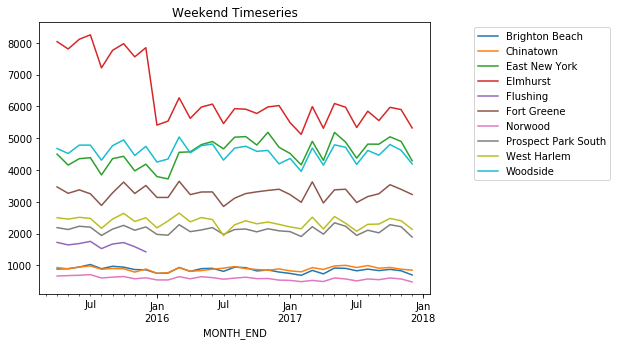

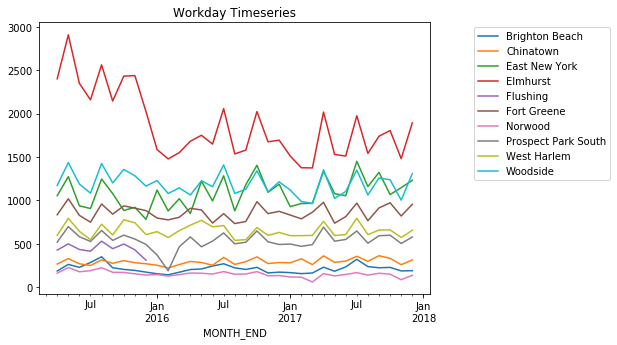

In [104]:
#Plotting WEEKEND DATA
plt.figure(); data_mnth_wkend_piv.plot(figsize=(7,5),colormap='tab10',legend=True, title='Weekend Timeseries');
plt.legend(bbox_to_anchor=(1.1, 1))
#Plotting WORKDAY DATA
plt.figure(); data_mnth_wkd_piv.plot(figsize=(7,5),colormap='tab10',legend=True, title='Workday Timeseries');
plt.legend(bbox_to_anchor=(1.1, 1))

## Exporting DataFrame to CSV for further analysis in Tableau

In [111]:
daily_exits['MONTH_END']=daily_exits['DATE_NEW']+pd.offsets.MonthEnd(0)
daily_exits=daily_exits[(daily_exits['MONTH_END']!='2018-01-31') & (daily_exits['MONTH_END']!='2015-03-31')]
daily_exits.to_csv('MTA_Exits.csv')